### Imports

In [1]:
import sys
sys.path.insert(0, "..")
from utils.dataset_utils import OriginalDataset, plot_image_array, plot_delta

# Standard Downloads
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
original_dataset = OriginalDataset('../datasets/droid_100_sample_pictures')
len_ = (original_dataset.__len__())
print(len_)

166


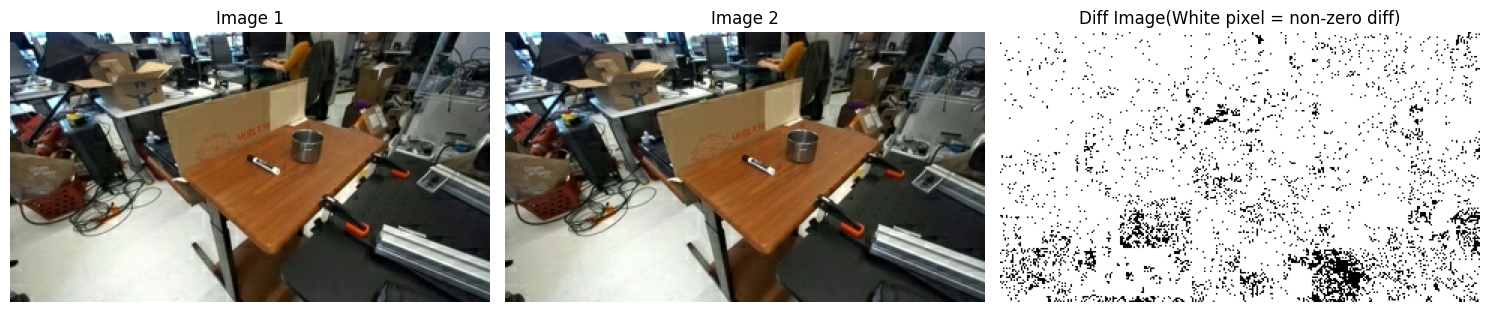

In [3]:
image1 = original_dataset[0]
image2 = original_dataset[1]

non_zero_diff_count, image3 = plot_delta(image2 - image1)
# Create a figure to hold the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each image
axes[0].imshow(image1)
axes[0].set_title('Image 1')
axes[0].axis('off')  # Turn off axis labels

axes[1].imshow(image2)
axes[1].set_title('Image 2')
axes[1].axis('off')

axes[2].imshow(image3, cmap="gray")
axes[2].set_title('Diff Image(White pixel = non-zero diff)')
axes[2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

Traversing strategy:

Row by Row, Left to Right

In [4]:
non_zero_diff_count

52461

Histogram Plots


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


diff.shape = (180, 320, 3)
r.shape = (180, 320)
g.shape = (180, 320)
b.shape = (180, 320)


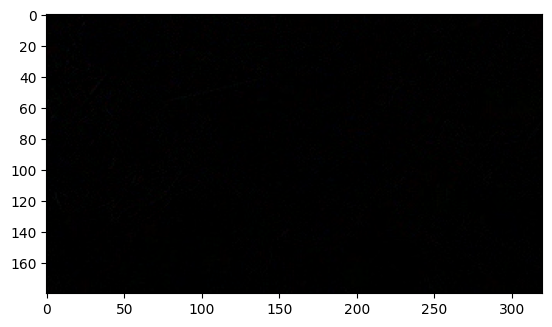

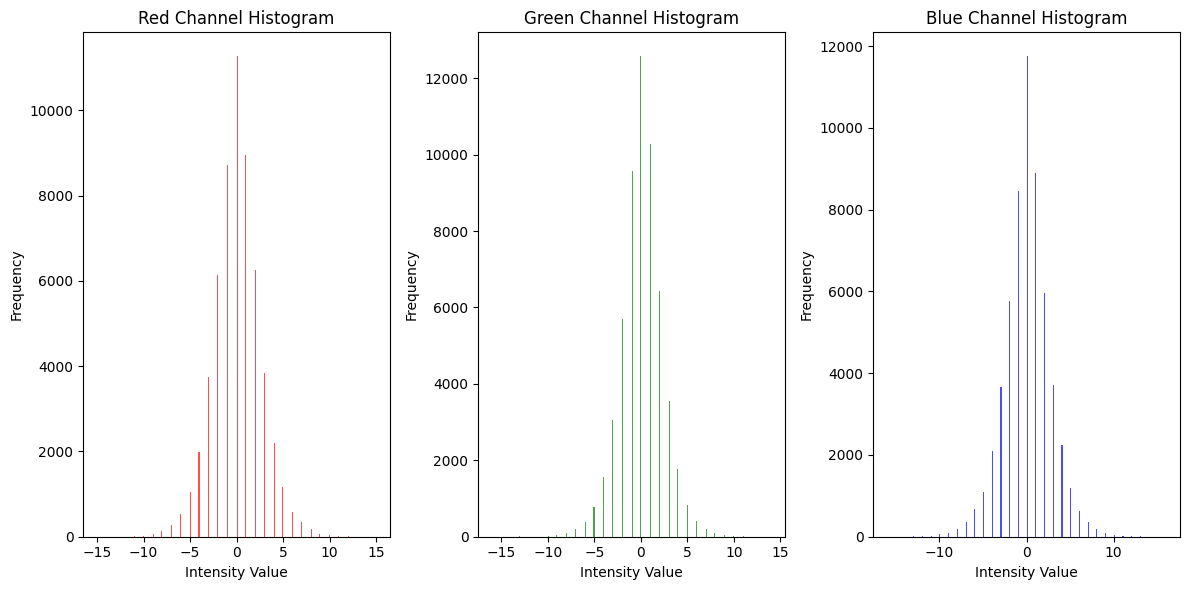

In [41]:
import numpy as np

image1 = np.array(image1, dtype = np.int16)
image2 = np.array(image2, dtype = np.int16)
diff  = image2 - image1
plt.imshow(diff)
r = diff[:, :, 0]
g = diff[:, :, 1]
b = diff[:, :, 2]
print(f'{diff.shape = }')
print(f'{r.shape = }')
print(f'{g.shape = }')
print(f'{b.shape = }')


# Plot the histograms for each channel
plt.figure(figsize=(12, 6))

# Plot for the Red channel
plt.subplot(1, 3, 1)
plt.hist(r.ravel(), bins=256, color='red', alpha=0.7)
plt.title('Red Channel Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

# Plot for the Green channel
plt.subplot(1, 3, 2)
plt.hist(g.ravel(), bins=256, color='green', alpha=0.7)
plt.title('Green Channel Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

# Plot for the Blue channel
plt.subplot(1, 3, 3)
plt.hist(b.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Blue Channel Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')



plt.tight_layout()
plt.show()

# plt.hist(r)

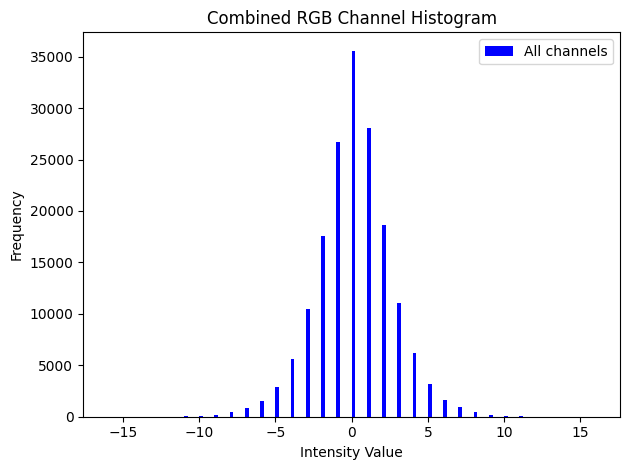

In [42]:
# plot for all channels
plt.hist(diff.ravel(), bins=128, color='blue',  label='All channels')
# plt.hist(g.ravel(), bins=256, color='green', alpha=0.5, label='Green Channel')
# plt.hist(b.ravel(), bins=256, color='blue', alpha=0.5, label='Blue Channel')

plt.title('Combined RGB Channel Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

### Original Image Storage

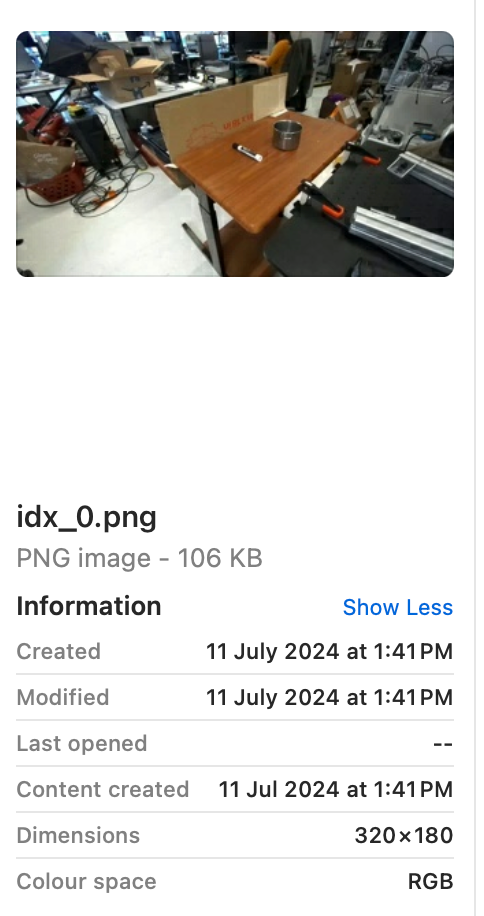

In [5]:
# origina image size in file system

import os
path_img = '../datasets/droid_100_sample_pictures/idx_1.png'
size_in_bytes = os.path.getsize(path_img)
kb_size = size_in_bytes/(10**3)
print(f'kb size : {kb_size} KB',)


kb size : 106.715 KB


In [6]:
num_pixels = image1.shape[0]* image1.shape[1] 
bit_size = num_pixels * image1.shape[2] * 8
Mb_size = bit_size / (10 ** 6)
print(f"Original Image Storage({bit_size} / (10 ** 6) = ", Mb_size)

Original Image Storage(1382400 / (10 ** 6) =  1.3824


### Compressed Image Storage

In [7]:
# a single bit for every pixel location, where 1 represents there is a diff
bit_map_storage = image1.shape[0]* image1.shape[1]
sparse_representation_bit_size = non_zero_diff_count * 3 * 8

total_mb_size = (bit_map_storage + sparse_representation_bit_size) / (10 ** 6)
print(f"Compressed Image Storage({bit_map_storage} + {sparse_representation_bit_size} / (10 ** 6)) = ", total_mb_size)

Compressed Image Storage(57600 + 1259064 / (10 ** 6)) =  1.316664
